In [1]:
import tqdm
import numpy as np
import scipy.stats
import pandas as pd
import sklearn
import sklearn.covariance
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)
import plotly
plotly.offline.init_notebook_mode(connected=True)

import kliep

## Multivariate Gaussian 1

In [2]:
tmis = [-0.5 * np.log(1 - c**2) for c in np.arange(0, 1, 0.1)]

In [3]:
mis = []
for c in tqdm.tqdm(np.arange(0, 1, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    XY = scipy.stats.multivariate_normal(mean=[0, 0], cov=cov).rvs(1000)
    X, Y = np.split(XY, [1], axis=1)
    mis += [kliep.mutual_information(X, Y, sigma=0.5)]

100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


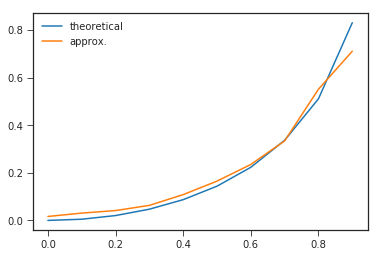

In [4]:
plt.plot(np.arange(0, 1, 0.1), tmis, label='theoretical')
plt.plot(np.arange(0, 1, 0.1), mis, label='approx.')
plt.legend()

## Multivariate Gaussian 2

In [5]:
pre = [[1,   0.5,    0],
       [0.5,   1, -0.5],
       [0,  -0.5,    1]]
cov = np.linalg.inv(pre)
print(np.array(pre))
X = scipy.stats.multivariate_normal(mean=[0, 0, 0], cov=cov).rvs(3000)

[[ 1.   0.5  0. ]
 [ 0.5  1.  -0.5]
 [ 0.  -0.5  1. ]]


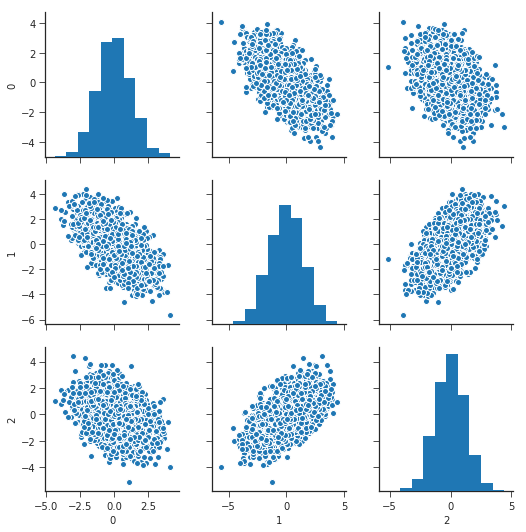

In [6]:
sns.pairplot(pd.DataFrame(X))

In [7]:
pre = sklearn.covariance.GraphLasso(alpha=0.3).fit(X).precision_
mi = kliep.calc_mi_matrix(X)
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 3/3 [00:15<00:00,  5.16s/it]


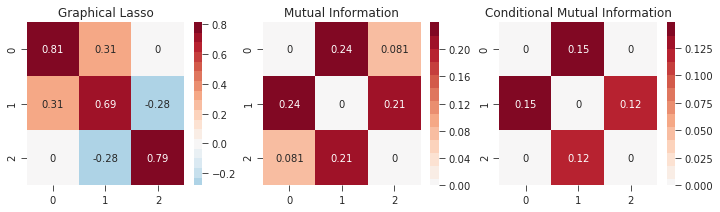

In [8]:
f, axes = plt.subplots(1, 3, figsize=[12, 3])
axes[0].set_title('Graphical Lasso')
axes[1].set_title('Mutual Information')
axes[2].set_title('Conditional Mutual Information')
sns.heatmap(pre, annot=True, ax=axes[0], center=0, cmap=palette)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette)
plt.savefig('output/mi-synthetic-gaussian.png', dpi=120)

## Multivariate Gaussian Mixuture

In [9]:
X1 = scipy.stats.multivariate_normal(mean=[-4,  0,  0], cov=np.eye(3)).rvs(500)
X2 = scipy.stats.multivariate_normal(mean=[+4,  0,  0], cov=[[1, 0, 0], [0, 6, 0], [0, 0, 1]]).rvs(500)
X = np.vstack([X1, X2])
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X.shape

(1000, 3)

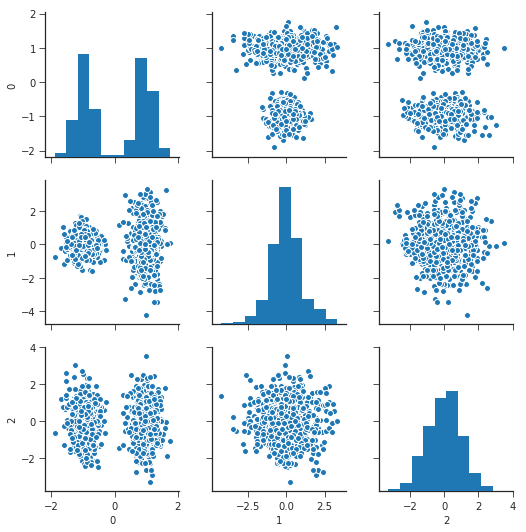

In [10]:
sns.pairplot(pd.DataFrame(X))

In [11]:
pre = sklearn.covariance.GraphLasso(alpha=0.015).fit(X).precision_
mi = kliep.calc_mi_matrix(X)
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


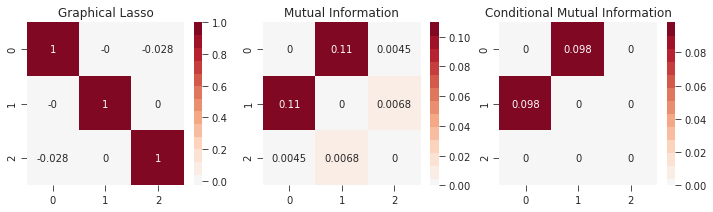

In [12]:
f, axes = plt.subplots(1, 3, figsize=[12, 3])
axes[0].set_title('Graphical Lasso')
axes[1].set_title('Mutual Information')
axes[2].set_title('Conditional Mutual Information')
sns.heatmap(pre, annot=True, ax=axes[0], center=0, cmap=palette)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette)
plt.savefig('output/mi-synthetic-gaussian-mixture.png', dpi=120)